C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5541 - loss: 1.4208 - val_accuracy: 0.4926 - val_loss: 0.6999
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9009 - loss: 0.2641 - val_accuracy: 0.4926 - val_loss: 0.9924
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9687 - loss: 0.1023 - val_accuracy: 0.7438 - val_loss: 0.5514
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.8276 - val_loss: 0.4244
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9979 - loss: 0.0180 - val_accuracy: 0.8325 - val_loss: 0.4106
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9945 - loss: 0.0130 - val_accuracy: 0.7586 - val_loss: 0.5268
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9999 - loss: 0.0057 - val_accuracy: 0.7783 - val_loss: 0.5064
Epoch 8/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9995 - loss: 0.0081 - val_accu

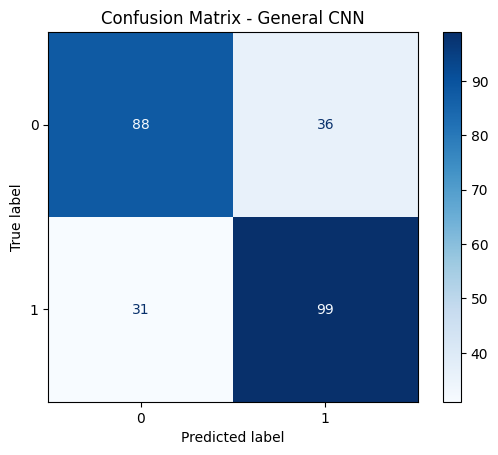

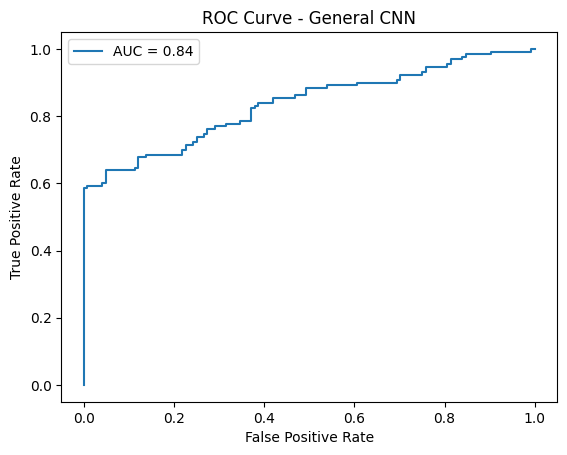

In [1]:
# General CNN Model
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("updated_autism_dataset.csv")
image_folder = "generated_images"

# Preprocessing Images
def load_image(image_name):
    path = os.path.join(image_folder, image_name)
    if os.path.exists(path):
        img = cv2.imread(path)
        img = cv2.resize(img, (64, 64))
        img = img / 255.0
        return img
    else:
        return np.zeros((64, 64, 3))

heatmap_images = np.array([load_image(img) for img in df["Heatmap_Image"]])
spectrogram_images = np.array([load_image(img) for img in df["Spectrogram_Image"]])

# Concatenate both images
images = np.concatenate((heatmap_images, spectrogram_images), axis=3) if heatmap_images.ndim == 4 else heatmap_images

# Target variable
y = df["Autism_Detected"].values

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

# General CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 6)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=8)

# Evaluation
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - General CNN")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve - General CNN")
plt.show()


Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5696 - loss: 4.2597 - val_accuracy: 0.4877 - val_loss: 0.6972
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7798 - loss: 0.4690 - val_accuracy: 0.5123 - val_loss: 0.8953
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8889 - loss: 0.2888 - val_accuracy: 0.5567 - val_loss: 1.0054
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9090 - loss: 0.2001 - val_accuracy: 0.5862 - val_loss: 0.8768
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9377 - loss: 0.1656 - val_accuracy: 0.9064 - val_loss: 0.2909
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9677 - loss: 0.1337 - val_accuracy: 0.9409 - val_loss: 0.2546
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9740 - loss: 0.1122 - val_accuracy: 0.9655 - val_loss: 0.1650
Epoch 8/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9788 - loss: 0.1091 - val_accu

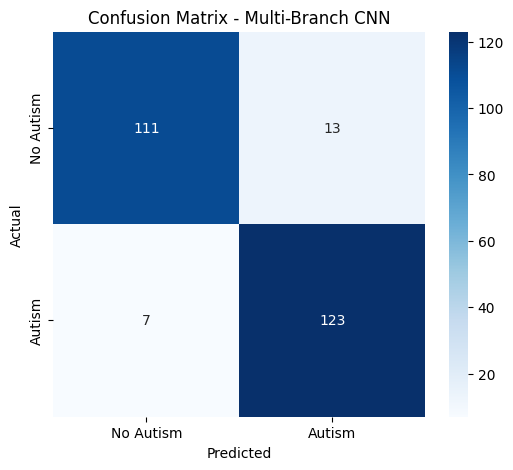

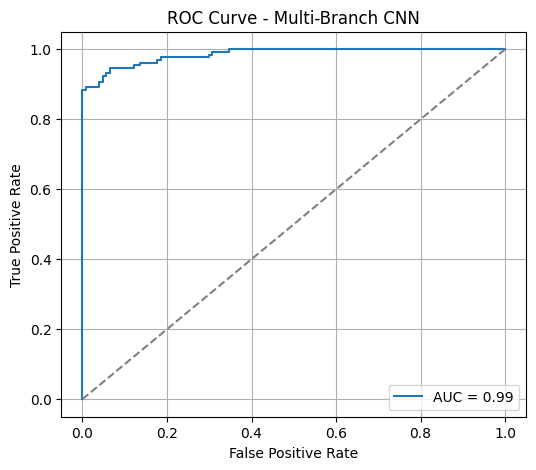

In [2]:
# Multi-Branch CNN for Autism Detection

import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("updated_autism_dataset.csv")
image_folder = "generated_images"

# Image preprocessing function
def load_image(image_name):
    path = os.path.join(image_folder, image_name)
    if os.path.exists(path):
        img = cv2.imread(path)
        img = cv2.resize(img, (64, 64))
        img = img / 255.0
        return img
    else:
        return np.zeros((64, 64, 3))  # Handle missing image

# Load image data
heatmap_images = np.array([load_image(img) for img in df["Heatmap_Image"]])
spectrogram_images = np.array([load_image(img) for img in df["Spectrogram_Image"]])

# Load numerical data
numerical_data = df[["Age", "Gender", "Eye_Contact_Percentage", "Fixation_Duration_ms",
                     "Saccade_Length_px", "Speech_Rate_WPS", "Pause_Duration_Sec"]].values
y = df["Autism_Detected"].values

# Train-test split
X_hm_train, X_hm_test, X_sp_train, X_sp_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    heatmap_images, spectrogram_images, numerical_data, y, test_size=0.2, random_state=42
)

# CNN branch builder
def build_cnn_branch(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    return input_layer, x

# Build branches
heatmap_input, heatmap_branch = build_cnn_branch((64, 64, 3))
spectrogram_input, spectrogram_branch = build_cnn_branch((64, 64, 3))

# Numerical input branch
numerical_input = Input(shape=(7,))
num_branch = Dense(64, activation='relu')(numerical_input)

# Merge and create model
merged = Concatenate()([heatmap_branch, spectrogram_branch, num_branch])
dense = Dense(128, activation='relu')(merged)
drop = Dropout(0.3)(dense)
output = Dense(1, activation='sigmoid')(drop)

model = Model(inputs=[heatmap_input, spectrogram_input, numerical_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(
    [X_hm_train, X_sp_train, X_num_train], y_train,
    validation_split=0.2, epochs=15, batch_size=8
)

# Evaluate
y_pred_prob = model.predict([X_hm_test, X_sp_test, X_num_test]).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Autism", "Autism"], yticklabels=["No Autism", "Autism"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multi-Branch CNN")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Branch CNN")
plt.legend()
plt.grid(True)
plt.show()
